Saving figure concept_mean


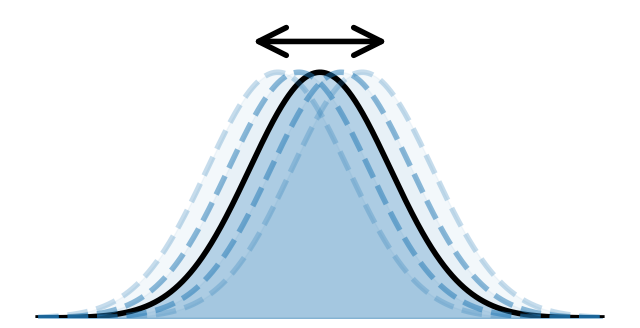

In [8]:
import os

import pyrootutils

PROJECT_ROOT_DIR = pyrootutils.setup_root(os.path.abspath(''), dotenv=True, pythonpath=True)
os.chdir(PROJECT_ROOT_DIR)


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from src.utils_visualization import NotebookFigureSaver
import random

random_seed = 42
np.random.seed(random_seed)
random.seed(random_seed)

# Where to save the figures
CHAPTER_ID = "z_paper_concepts"
fig_saver = NotebookFigureSaver(CHAPTER_ID)

# Define the mean and standard deviation
mu, sigma = 0, 1

# Create a range of values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Plot the normal distribution
fig_size = (8, 4)
fig, ax = plt.subplots(1, 1, figsize=fig_size, sharex=False, sharey=True)

alpha_base_factor = 1
lw_factor = 2
shift_factor = 0.3

plt.plot(x, norm.pdf(x, mu, sigma), label='', linestyle='-',lw=lw_factor * 2, color='black')
plt.fill_between(x, norm.pdf(x, mu, sigma), alpha=0.25*alpha_base_factor, color='tab:blue')

plt.plot(x, norm.pdf(x, mu-(shift_factor *1), sigma), label='', linestyle='--',lw=lw_factor * 2, alpha=0.5*alpha_base_factor, color='tab:blue')
plt.fill_between(x, norm.pdf(x, mu-(shift_factor *1), sigma), alpha=0.05*alpha_base_factor, color='tab:blue')
plt.plot(x, norm.pdf(x, mu+(shift_factor *1), sigma), label='', linestyle='--',lw=lw_factor * 2,alpha=0.5*alpha_base_factor, color='tab:blue')
plt.fill_between(x, norm.pdf(x, mu+(shift_factor *1), sigma), alpha=0.05*alpha_base_factor, color='tab:blue')

plt.plot(x, norm.pdf(x, mu-(shift_factor *2), sigma), label='', linestyle='--',lw=lw_factor * 2, alpha=0.25*alpha_base_factor, color='tab:blue')
plt.fill_between(x, norm.pdf(x, mu-(shift_factor *2), sigma), alpha=0.05*alpha_base_factor, color='tab:blue')
plt.plot(x, norm.pdf(x, mu+(shift_factor *2), sigma), label='', linestyle='--',lw=lw_factor * 2, alpha=0.25*alpha_base_factor, color='tab:blue')
plt.fill_between(x, norm.pdf(x, mu+(shift_factor *2), sigma), alpha=0.05*alpha_base_factor, color='tab:blue')

# Draw arrows indicating standard deviation
plt.annotate('', xy=(mu - sigma, norm.pdf(mu, mu, sigma)+0.05), xytext=(mu + sigma, norm.pdf(mu, mu, sigma)+0.05),
             arrowprops=dict(arrowstyle="<->",lw=lw_factor * 2,mutation_scale=50, color='black'))

# Remove axis ticks and labels
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, 0.5)

plt.box(False)
fig_saver.save_fig(f"concept_mean")
plt.show()


Saving figure concept_std


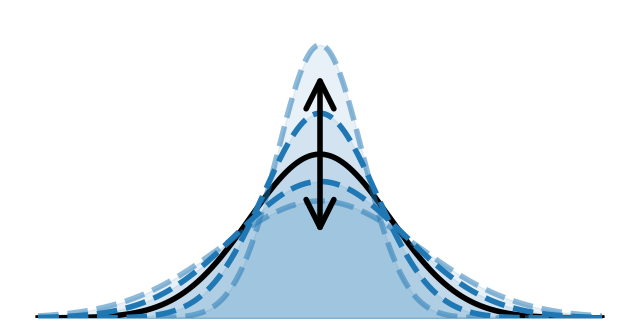

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the mean and standard deviation
mu, sigma = 0, 1

# Create a range of values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Plot the normal distribution
fig_size = (8, 4)
fig, ax = plt.subplots(1, 1, figsize=fig_size, sharex=False, sharey=True)

alpha_base_factor = 2
fill_alpha = 0.05

lw_factor = 2
shift_factor = 0.2


plt.plot(x, norm.pdf(x, mu, sigma), label='', linestyle='-',lw=lw_factor * 2, color='black')
plt.fill_between(x, norm.pdf(x, mu, sigma), alpha=fill_alpha*alpha_base_factor, color='tab:blue')

plt.plot(x, norm.pdf(x, mu, sigma-(shift_factor *1)), label='', linestyle='--',lw=lw_factor * 2, alpha=0.5*alpha_base_factor, color='tab:blue')
plt.fill_between(x, norm.pdf(x, mu, sigma-(shift_factor *1)), alpha=fill_alpha*alpha_base_factor, color='tab:blue')
plt.plot(x, norm.pdf(x, mu, sigma+(shift_factor *1)), label='', linestyle='--',lw=lw_factor * 2,alpha=0.5*alpha_base_factor, color='tab:blue')
plt.fill_between(x, norm.pdf(x, mu, sigma+(shift_factor *1)), alpha=fill_alpha*alpha_base_factor, color='tab:blue')

plt.plot(x, norm.pdf(x, mu, sigma-(shift_factor *2)), label='', linestyle='--',lw=lw_factor * 2, alpha=0.25*alpha_base_factor, color='tab:blue')
plt.fill_between(x, norm.pdf(x, mu, sigma-(shift_factor *2)), alpha=fill_alpha*alpha_base_factor, color='tab:blue')
plt.plot(x, norm.pdf(x, mu, sigma+(shift_factor *2)), label='', linestyle='--',lw=lw_factor * 2, alpha=0.25*alpha_base_factor, color='tab:blue')
plt.fill_between(x, norm.pdf(x, mu, sigma+(shift_factor *2)), alpha=fill_alpha*alpha_base_factor, color='tab:blue')

# Draw arrows indicating standard deviation
plt.annotate('', xy=(mu, norm.pdf(mu, mu, sigma)-0.2), xytext=(mu, norm.pdf(mu, mu, sigma)+0.2),
             arrowprops=dict(arrowstyle="<->",lw=lw_factor * 2,mutation_scale=50, color='black'))

# Remove axis ticks and labels
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, 0.75)

plt.box(False)
fig_saver.save_fig(f"concept_std")
plt.show()


Saving figure concept_time_series


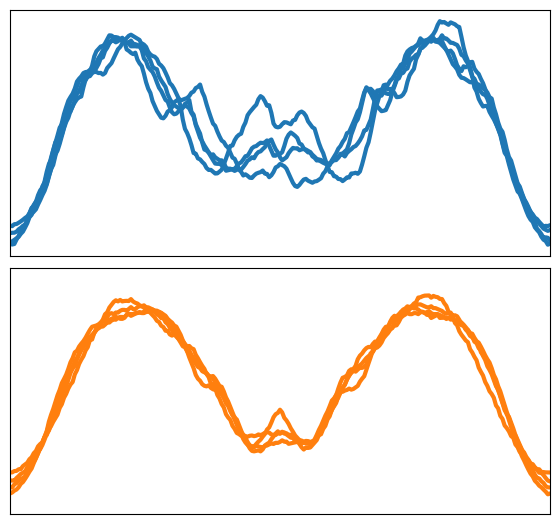

In [11]:
# %%
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns

from src.utils import _load_data_set, list_data_sets
from src.utils_visualization import NotebookFigureSaver
from src.utils_performance import (
    _get_data_set_descriptive_performance,
    _get_performance_master_dict
)
from tqdm import tqdm
from matplotlib.cm import get_cmap


data_set_name: str = "ArrowHead"
n_samples_per_class: int = 4
max_number_classes: int = 2

train_data, test_data = _load_data_set(
    data_set_name=data_set_name, multivariate=False
)

classes = train_data["class_val"].unique()
available_classes = len(classes)

if available_classes > max_number_classes:
    classes = classes[:max_number_classes]

cmap = matplotlib.colormaps.get_cmap("tab10")  # You can choose different colormaps like 'viridis', 'plasma', etc.

# Create subplots for each class
fig, axes = plt.subplots(
    len(classes), 1, figsize=(6, 3 * len(classes)), sharex=True, sharey=True
)

for i, target_class in enumerate(sorted(classes)):
    # Filter the data for the current class
    class_data = train_data[train_data["class_val"] == target_class]

    # Select n random samples from the target class
    class_samples = class_data.sample(n=n_samples_per_class)

    first_instance_in_class = True
    # Plot the selected time series on the corresponding subplot with the same color
    for idx, row in class_samples.iterrows():
        axes[i].plot(
            row["dim_0"], color=cmap(0) if i ==0 else cmap(1), alpha=1,  linewidth=3,
        ) 

    if i >= max_number_classes:
        break
plt.xticks([])
plt.xlim(0, 250)
plt.yticks([])
plt.xlabel('')
plt.ylabel('')

plt.subplots_adjust(hspace=.05, wspace=0., left=0.1, right=1., bottom=0.11, top=.95) 
fig_saver.save_fig(f"concept_time_series")
plt.show()

Saving figure concept_fingerprint


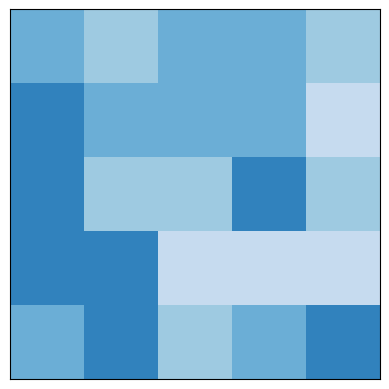

In [12]:
# generate a randomly generated 4x4 heatmap 
data = np.random.rand(5,5)
fig, ax = plt.subplots()
cax = ax.matshow(data, cmap='tab20c', vmin=0, vmax=5)

plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')

fig_saver.save_fig(f"concept_fingerprint")
plt.show()

Saving figure concept_baseline_mean


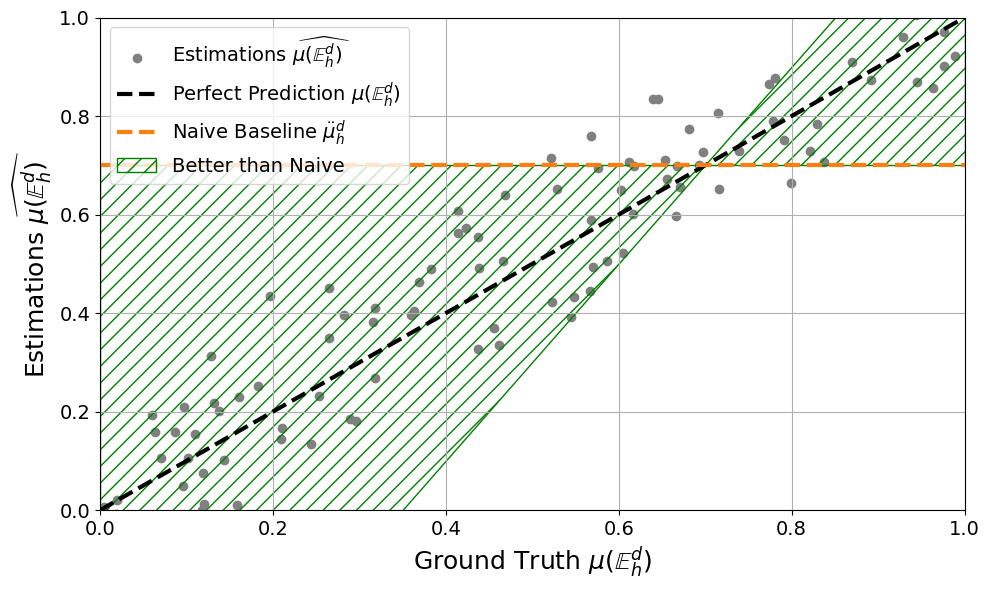

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# Simulated data
np.random.seed(0)
ground_truth = np.random.uniform(low=0., high=1.0, size=100)
estimated_performance = ground_truth + np.random.normal(loc=0, scale=0.1, size=ground_truth.shape)

naive_baseline = 0.7

# Borderline for performance improvement
x_vals = np.linspace(0., 1, 1000)
borderline_vals = 2 * x_vals - naive_baseline

fig, ax = plt.subplots(1,1, figsize=(10, 6), sharex=True, sharey=True)


ax.scatter(ground_truth, estimated_performance, c='grey', label=r'Estimations $\widehat{\mu(\mathbb{E}_{h}^{d})}$')
ax.plot([0., 1], [0., 1], color='black', linewidth=3, linestyle='--', label=r'Perfect Prediction ${\mu(\mathbb{E}_{h}^{d})}$')
ax.axhline(y=naive_baseline, color='tab:orange', linewidth=3, linestyle='--', label= r'Naive Baseline $\ddot{\mu}_{h}^d$')

ax.add_patch(Polygon([(naive_baseline,naive_baseline), (0,naive_baseline), (0,-naive_baseline)], facecolor='none', edgecolor='green', hatch='//', label='Better than Naive'))
ax.add_patch(Polygon([(naive_baseline,naive_baseline), (1,naive_baseline), (1,2-naive_baseline)], facecolor='none', edgecolor='green', hatch='//', label=''))


ax.set_xlabel(r'Ground Truth ${\mu(\mathbb{E}_{h}^{d})}$', fontsize=18)
ax.set_ylabel(r'Estimations $\widehat{\mu(\mathbb{E}_{h}^{d})}$', fontsize=18)
ax.set_xlim(0., 1)
ax.set_ylim(0., 1)
ax.tick_params(axis="y", labelsize=14) 
ax.tick_params(axis="x", labelsize=14) 
ax.legend(loc='upper left', ncol=1, fontsize=14)


ax.grid(True)
plt.tight_layout()
fig_saver.save_fig(f"concept_baseline_mean")
plt.show()

Saving figure concept_baseline_sigma


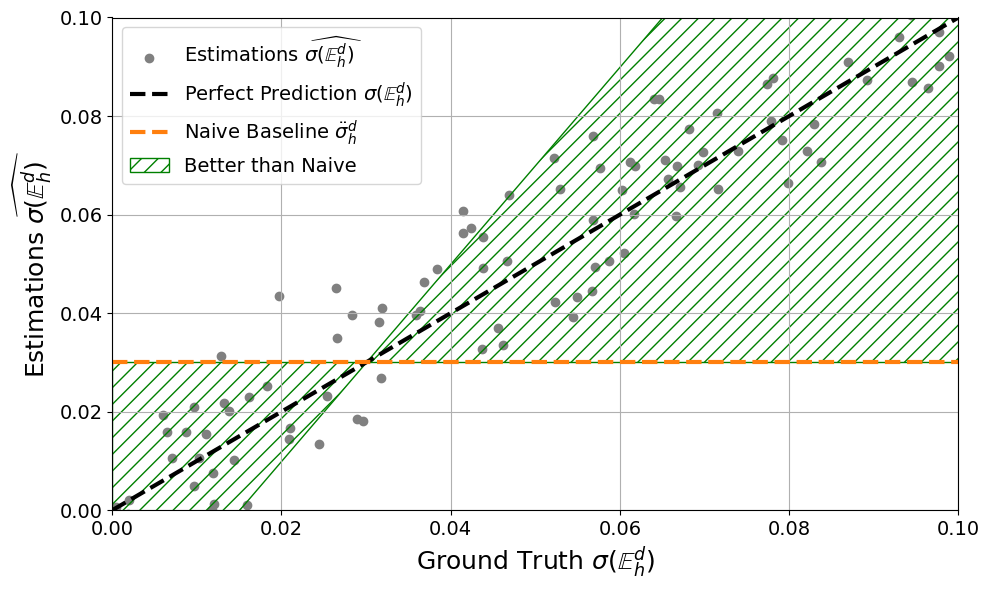

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# Simulated data
np.random.seed(0)
upper_limit= .1
naive_baseline = 0.03

ground_truth = np.random.uniform(low=0., high= upper_limit, size=100)
estimated_performance = ground_truth + np.random.normal(loc=0, scale=0.01, size=ground_truth.shape)


# Borderline for performance improvement
x_vals = np.linspace(0., upper_limit, 1000)
borderline_vals = 2 * x_vals - naive_baseline

fig, ax = plt.subplots(1,1, figsize=(10, 6), sharex=True, sharey=True)


ax.scatter(ground_truth, estimated_performance, c='grey', label=r'Estimations $\widehat{\sigma(\mathbb{E}_{h}^{d})}$')
ax.plot([0., 1], [0., 1], color='black', linewidth=3, linestyle='--', label=r'Perfect Prediction ${\sigma(\mathbb{E}_{h}^{d})}$')
ax.axhline(y=naive_baseline, color='tab:orange', linewidth=3, linestyle='--', label= r'Naive Baseline $\ddot{\sigma}_{h}^d$')

ax.add_patch(Polygon([(naive_baseline,naive_baseline), (0,naive_baseline), (0,-naive_baseline)], facecolor='none', edgecolor='green', hatch='//', label='Better than Naive'))
ax.add_patch(Polygon([(naive_baseline,naive_baseline), (1,naive_baseline), (1,2-naive_baseline)], facecolor='none', edgecolor='green', hatch='//', label=''))

ax.set_xlabel(r'Ground Truth ${\sigma(\mathbb{E}_{h}^{d})}$', fontsize=18)
ax.set_ylabel(r'Estimations $\widehat{\sigma(\mathbb{E}_{h}^{d})}$', fontsize=18)
ax.set_xlim(0., upper_limit)
ax.set_ylim(0., upper_limit)
ax.tick_params(axis="y", labelsize=14) 
ax.tick_params(axis="x", labelsize=14) 
ax.legend(loc='upper left', ncol=1, fontsize=14)


ax.grid(True)
plt.tight_layout()
fig_saver.save_fig(f"concept_baseline_sigma")
plt.show()

0.07514073433853466

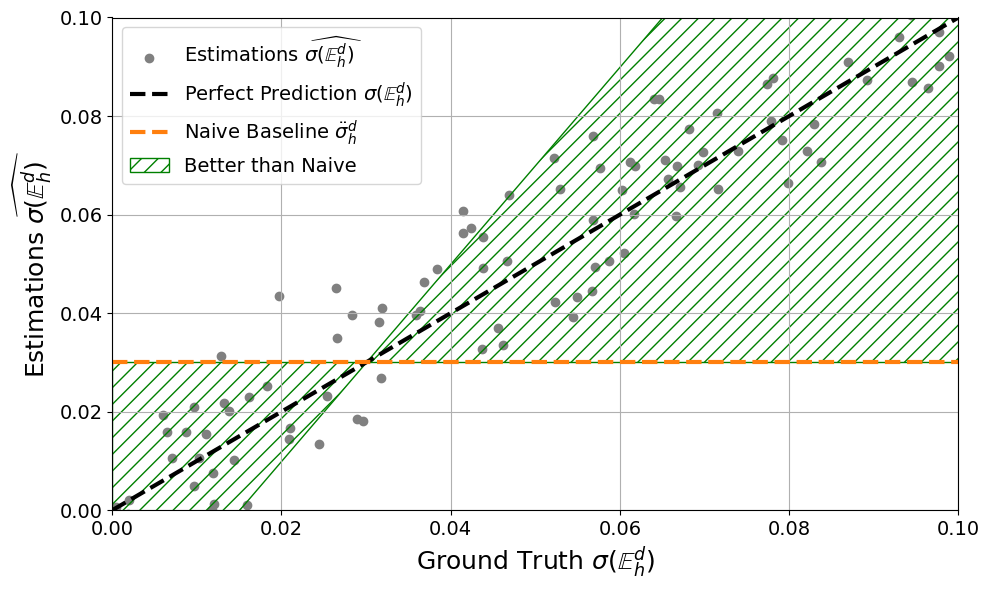

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# Simulated data
np.random.seed(0)
upper_limit = .1
naive_baseline = 0.03

ground_truth = np.random.uniform(low=0., high=upper_limit, size=100)
estimated_performance = ground_truth + np.random.normal(loc=0, scale=0.01, size=ground_truth.shape)

# Borderline for performance improvement
x_vals = np.linspace(0., upper_limit, 1000)
borderline_vals = 2 * x_vals - naive_baseline

fig, ax = plt.subplots(1, 1, figsize=(10, 6), sharex=True, sharey=True)

ax.scatter(ground_truth, estimated_performance, c='grey', label=r'Estimations $\widehat{\sigma(\mathbb{E}_{h}^{d})}$')
ax.plot([0., 1], [0., 1], color='black', linewidth=3, linestyle='--', label=r'Perfect Prediction ${\sigma(\mathbb{E}_{h}^{d})}$')
ax.axhline(y=naive_baseline, color='tab:orange', linewidth=3, linestyle='--', label=r'Naive Baseline $\ddot{\sigma}_{h}^d$')

if False:
    # choose a random sample to highlight
    sample_choice = 11
    sample_gt , sample_estimation = ground_truth[sample_choice], estimated_performance[sample_choice]
    ax.scatter(sample_gt, sample_estimation,s=200, c='red', marker='x',  label="")
    # indicate the difference between the ground truth and the estimation
    ax.plot([sample_gt, sample_gt], [sample_estimation, sample_gt], color='red', linewidth=3, linestyle='-', label= '')
    ax.text(sample_gt + 0.002, (sample_estimation+sample_gt)/2, r'$|\widehat{\mu(\mathbb{E}_{h}^{d})} - \mu{(\mathbb{E}_{h}^{d})}|$', fontsize=14, color='red', bbox = {'facecolor': 'white', 'alpha': 0.8, 'pad': 4})

    # indicate the difference between the ground truth and the naive baseline
    ax.plot([sample_gt, sample_gt], [naive_baseline, sample_gt], color='blue', linewidth=3, linestyle='-', label= '')
    ax.text(sample_gt + 0.002, (naive_baseline+sample_gt)/2, r'$|\ddot{\mu}_{h}^d -\mu{(\mathbb{E}_{h}^{d})}|$', fontsize=14, color='blue', bbox = {'facecolor': 'white', 'alpha': 0.8, 'pad': 4})

# Adjusting polygon patches
ax.add_patch(Polygon([(naive_baseline, naive_baseline), (0, naive_baseline), (0, -naive_baseline)], facecolor='none', edgecolor='green', hatch='//', label='Better than Naive'))
ax.add_patch(Polygon([(naive_baseline, naive_baseline), (1, naive_baseline), (1, 2 - naive_baseline)], facecolor='none', edgecolor='green', hatch='//', label=''))

ax.set_xlabel(r'Ground Truth ${\sigma(\mathbb{E}_{h}^{d})}$', fontsize=18)
ax.set_ylabel(r'Estimations $\widehat{\sigma(\mathbb{E}_{h}^{d})}$', fontsize=18)
ax.set_xlim(0., upper_limit)
ax.set_ylim(0., upper_limit)
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.legend(loc='upper left', ncol=1, fontsize=14)

ax.grid(True)
plt.tight_layout()
# fig_saver.save_fig(f"concept_baseline_sigma")  # Uncomment and define fig_saver if needed
plt.show()
